In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['text.usetex'] = False

For dCmr4 CRISPR11 vs CRISPR5 recombination

In [3]:
df = pd.read_csv('./CR11vsCR5_dCmr4.csv', sep=',')
df.head()

read_name   CRISPR1  spacer1  begin1  end1  \
0  000c13a3-0ee7-48dc-9acc-ef960bc35d04  CRISPR11  spacer2     594   632   
1  001393a6-ab2c-4eac-8bdb-7eca87167ed5   CRISPR5  spacer2     552   588   
2  002dbd99-1522-4ba5-b2c8-9de1ae165ea7  CRISPR11  spacer2     609   637   
3  00303a53-170d-4e30-b59d-3a59ffd6d27a  CRISPR11  spacer2     605   636   
4  0073f72a-ac0c-4edd-806f-47698c0e509c   CRISPR5  spacer2     528   562   

    CRISPR2  spacer2  begin2  end2 primers   rep CRISPR1_ord spacer1_ord  \
0   CRISPR5  spacer2     687   723   F1_R2  rep2     CRISPR5     spacer2   
1  CRISPR11  spacer2     642   682   F1_R2  rep2     CRISPR5     spacer2   
2   CRISPR5  spacer2     688   721   F1_R2  rep2     CRISPR5     spacer2   
3   CRISPR5  spacer6     673   716   F1_R2  rep1     CRISPR5     spacer6   
4  CRISPR11  spacer2     599   639   F1_R2  rep1     CRISPR5     spacer2   

  CRISPR2_ord spacer2_ord  diff  filter  
0    CRISPR11     spacer2    55    True  
1    CRISPR11     spacer2    54    True  
2    CRISPR11     spacer2    51    True  
3    CRISPR11     spacer2    37    True  
4    CRISPR11     spacer2    37    True

In [4]:
g = df.groupby(['spacer2_ord', 'spacer1_ord'])
rec_cnt = g.read_name.nunique()
rec_cnt

spacer2_ord  spacer1_ord
spacer1      spacer1        3
             spacer2        4
             spacer3        2
             spacer4        5
             spacer5        4
                           ..
spacer8      spacer5        3
             spacer6        6
spacer9      spacer3        1
             spacer4        3
             spacer5        6
Name: read_name, Length: 65, dtype: int64

In [5]:
df_rec_cnt = rec_cnt.reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt.fillna(0, inplace=True)
a=df_rec_cnt.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
a.fillna(0, inplace=True)

In [7]:
a

spacer1_ord  spacer1  spacer2  spacer3  spacer4  spacer5  spacer6
spacer2_ord                                                      
spacer1          3.0      4.0      2.0      5.0      4.0      5.0
spacer2          0.0   2293.0      2.0      1.0      3.0    437.0
spacer3          0.0      5.0      4.0      0.0      4.0      4.0
spacer4          0.0    237.0      1.0      1.0      9.0      2.0
spacer5          2.0      0.0      2.0      2.0      3.0      4.0
spacer6          1.0      0.0      1.0      0.0      1.0      4.0
spacer7          0.0      3.0      2.0      0.0      5.0      3.0
spacer8          0.0      3.0      3.0      2.0      3.0      6.0
spacer9          0.0      0.0      1.0      3.0      6.0      0.0
spacer10         0.0      2.0      0.0      3.0      0.0      0.0
spacer11         0.0      1.0      5.0      1.0      1.0      4.0
spacer12         0.0     88.0      0.0      3.0      0.0      3.0
spacer13         0.0      0.0      1.0      2.0      2.0      4.0
spacer14         0.0      0.0      0.0      0.0      0.0      0.0
spacer15         0.0      0.0      0.0     78.0      0.0      1.0
spacer16         0.0      0.0      0.0      1.0      2.0      1.0
spacer17         0.0      0.0      0.0      0.0      1.0      0.0
spacer18         0.0      0.0      2.0     27.0      1.0     38.0

In [6]:
dic={
    'spacer1':'1',
    'spacer2':'2',
    'spacer3':'3',
    'spacer4':'4',
    'spacer5':'5',
    'spacer6':'6',
    'spacer7':'7',
    'spacer8':'8',
    'spacer9':'9',
    'spacer10':'10',
    'spacer11':'11',
    'spacer12':'12',
    'spacer13':'13',
    'spacer14':'14',
    'spacer15':'15',
    'spacer16':'16',
    'spacer17':'17',
    'spacer18':'18'
}
a.rename(columns=dic, inplace=True)
a.rename(dic, inplace=True)

In [7]:
dic

{'spacer1': '1',
 'spacer2': '2',
 'spacer3': '3',
 'spacer4': '4',
 'spacer5': '5',
 'spacer6': '6',
 'spacer7': '7',
 'spacer8': '8',
 'spacer9': '9',
 'spacer10': '10',
 'spacer11': '11',
 'spacer12': '12',
 'spacer13': '13',
 'spacer14': '14',
 'spacer15': '15',
 'spacer16': '16',
 'spacer17': '17',
 'spacer18': '18'}

In [ ]:
Let's plot the heatmap for first pair of cassettes.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


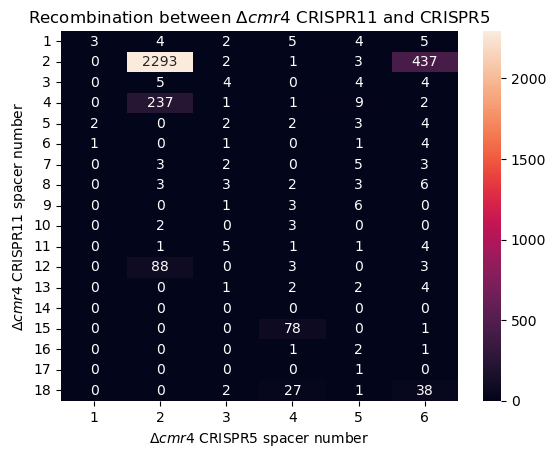

In [8]:
ax=sns.heatmap(a, annot=True, fmt="g")
ax.set_title('Recombination between $\Delta cmr4$ CRISPR11 and CRISPR5')
ax.set(xlabel='$\Delta cmr4$ CRISPR5 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')
plt.yticks(rotation=0)
plt.savefig('dcmr4_11vs5_raw.png', dpi=360, bbox_inches='tight')
plt.show()

Plot the same by 3 reps to check reproducibility

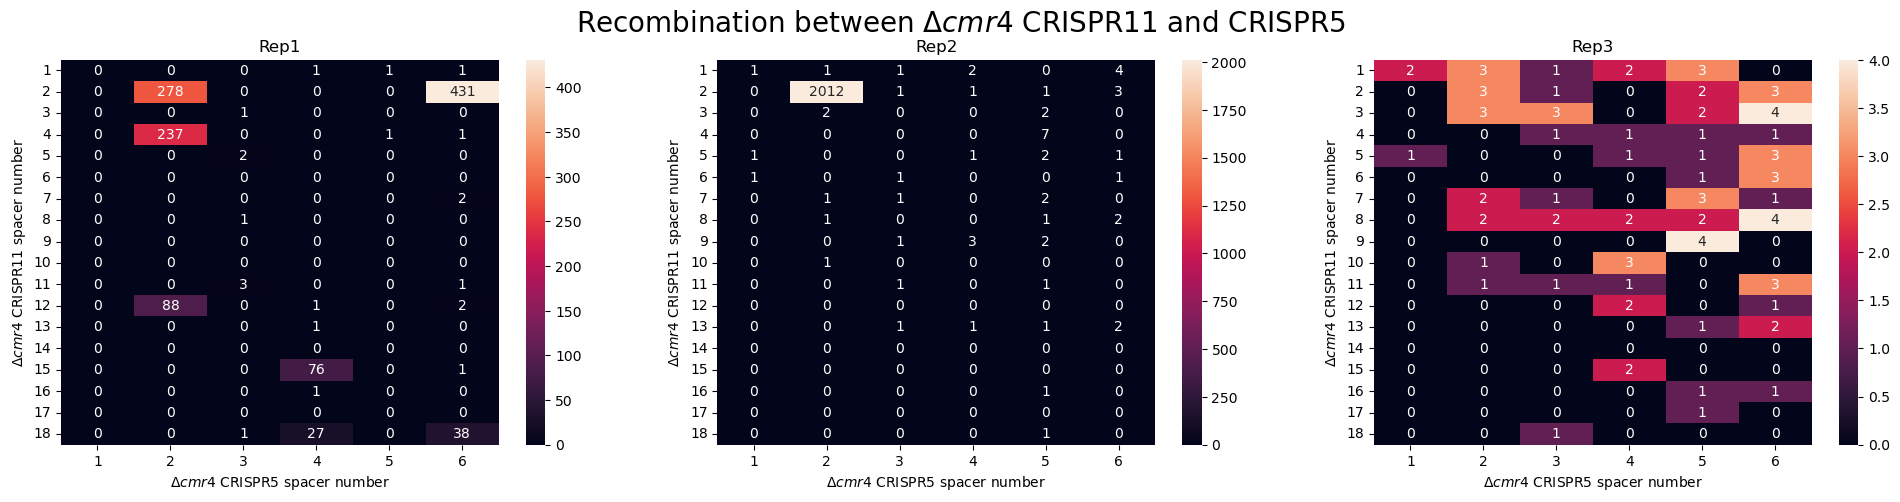

In [11]:
g = df.groupby(['spacer2_ord', 'spacer1_ord', 'rep'])
rec_cnt = g.read_name.nunique()

fig, axes = plt.subplots(1, 3, figsize=(24, 5)) #, gridspec_kw={'width_ratios': [a, b, c]})
fig.suptitle('Recombination between $\Delta cmr4$ CRISPR11 and CRISPR5', fontsize=20)

df_rec_cnt1 = rec_cnt.loc[:,:,'rep1'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt1.fillna(0, inplace=True)
h1=df_rec_cnt1.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
h1['spacer1']=0
h1=h1[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6']]
h1.fillna(0, inplace=True)
h1.rename(columns=dic, inplace=True)
h1.rename(dic, inplace=True)
sns.heatmap(h1, annot=True, ax=axes[0], fmt="g")
axes[0].set_title('Rep1')
axes[0].set(xlabel='$\Delta cmr4$ CRISPR5 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

df_rec_cnt2 = rec_cnt.loc[:,:,'rep2'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt2.fillna(0, inplace=True)
h2=df_rec_cnt2.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
h2.fillna(0, inplace=True)
h2.rename(columns=dic, inplace=True)
h2.rename(dic, inplace=True)
sns.heatmap(h2, annot=True, ax=axes[1], fmt="g")
axes[1].set_title('Rep2')
axes[1].set(xlabel='$\Delta cmr4$ CRISPR5 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

df_rec_cnt3 = rec_cnt.loc[:,:,'rep3'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt3.fillna(0, inplace=True)
h3=df_rec_cnt3.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
h3.fillna(0, inplace=True)
h3.rename(columns=dic, inplace=True)
h3.rename(dic, inplace=True)
sns.heatmap(h3, annot=True, ax=axes[2], fmt="g")
axes[2].set_title('Rep3')
axes[2].set(xlabel='$\Delta cmr4$ CRISPR5 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

for i in range(0, 3):
  for tick in axes[i].get_yticklabels():
    tick.set_rotation(0)

plt.savefig('dcmr4_11vs5_byreps.png', dpi=360, bbox_inches='tight')
plt.show()

Some big values in these tables are not reproducible. These values can be PCR over-replicates. Since the majority of cells have the value less than 15, set 15 as a threshold for possible PCR over-replicates. If one replicate have value greater than 15 in one cell, we make it equal to 1 (but it can have different value in other replicates).

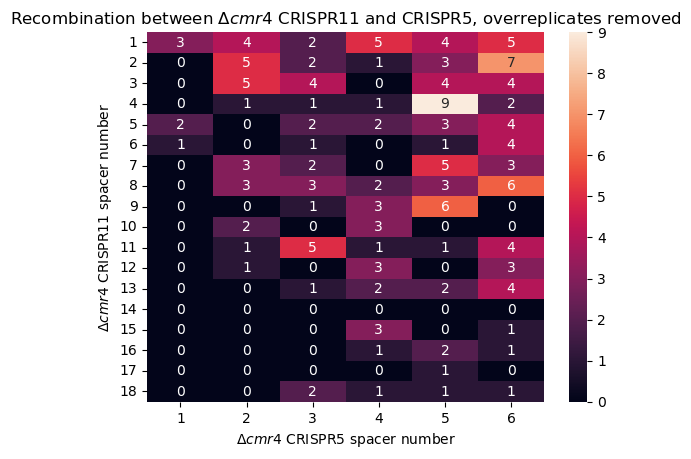

In [12]:
h1[h1>15]=1
h2[h2>15]=1
h3[h3>15]=1
h_thr_dcmr11vs5=h1+h2+h3
ax=sns.heatmap(h_thr_dcmr11vs5, annot=True, fmt="g")
ax.set_title('Recombination between $\Delta cmr4$ CRISPR11 and CRISPR5, overreplicates removed')
ax.set(xlabel='$\Delta cmr4$ CRISPR5 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

plt.yticks(rotation=0)
plt.savefig('dcmr4_11vs5_removed.png', dpi=360, bbox_inches='tight')
plt.show()

Consequent analysis is the same for another pairs of cassettes.
For dCmr4 CRISPR11 vs CRISPR2 recombination

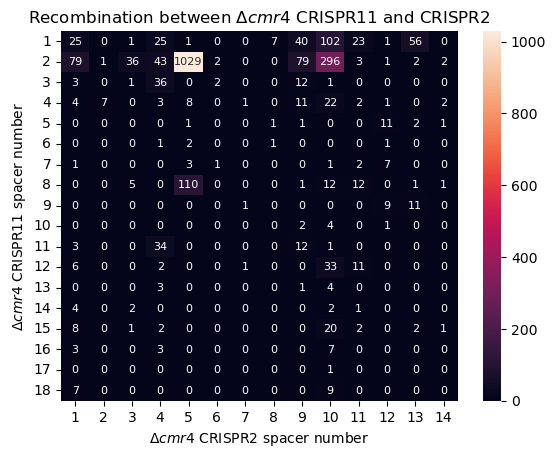

In [42]:
df1 = pd.read_csv('./CR11vsCR2_dCmr4.csv', sep=',')
g = df1.groupby(['spacer2_ord', 'spacer1_ord'])
rec_cnt1 = g.read_name.nunique()
df1_rec_cnt = rec_cnt1.reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df1_rec_cnt.fillna(0, inplace=True)
a=df1_rec_cnt.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
a=a[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14']]
a.rename(columns=dic, inplace=True)
a.rename(dic, inplace=True)
ax=sns.heatmap(a, annot=True, annot_kws={'fontsize': 8}, fmt="g")

#annot_kws={'fontsize': 7} is the font size
#fmt="g" is to avoid long notations etc. 1.1e05 in cells

ax.set_title('Recombination between $\Delta cmr4$ CRISPR11 and CRISPR2')
ax.set(xlabel='$\Delta cmr4$ CRISPR2 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')
plt.yticks(rotation=0)
plt.savefig('dcmr4_11vs2_raw.png', dpi=360, bbox_inches='tight')
plt.show()

For dCmr4 CRISPR11 vs CRISPR2 recombination, by 3 reps

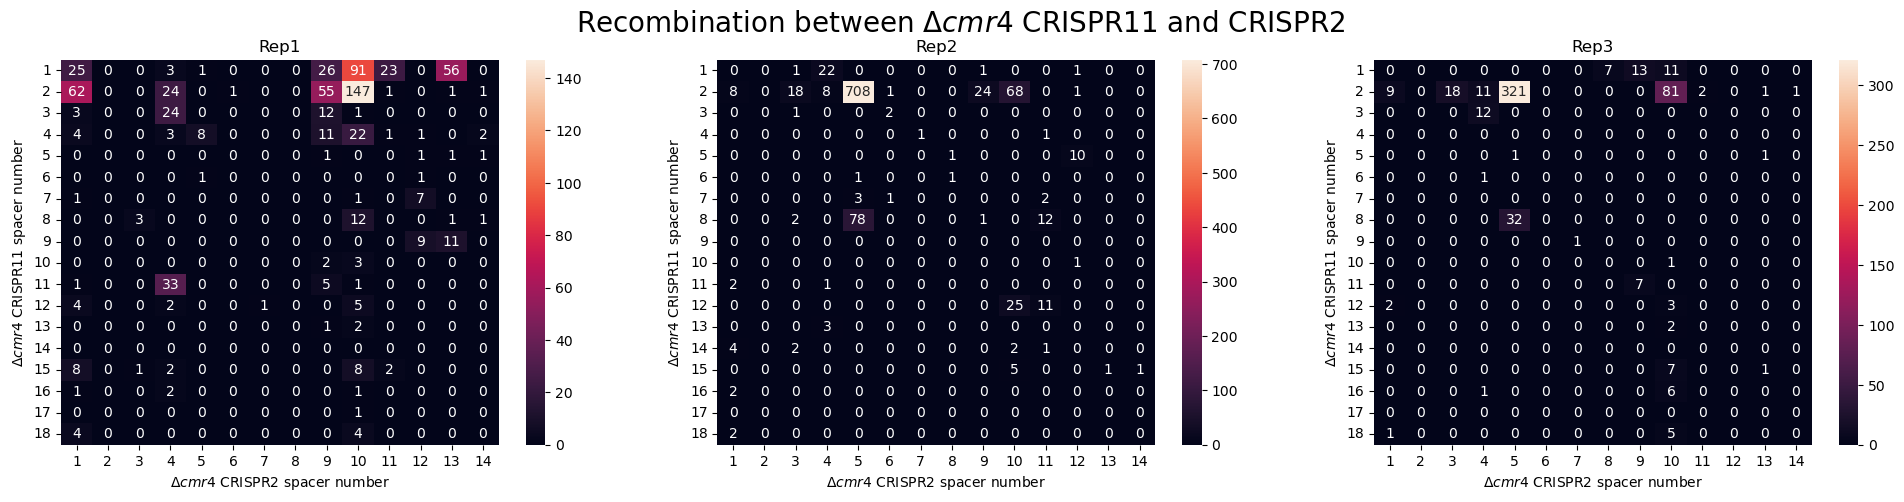

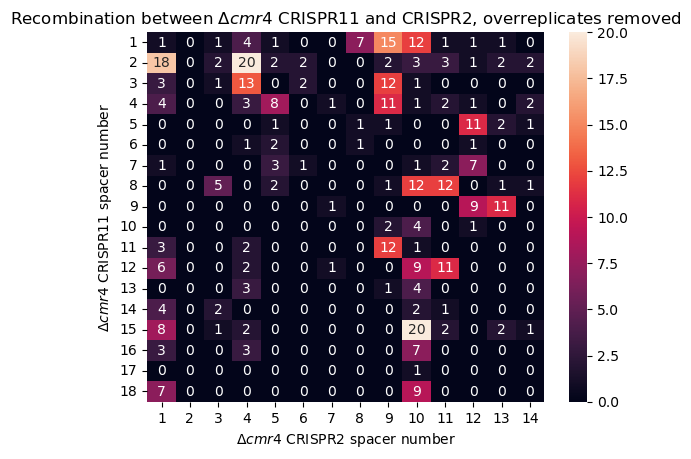

In [43]:
g = df1.groupby(['spacer2_ord', 'spacer1_ord', 'rep'])
rec_cnt = g.read_name.nunique()

fig, axes = plt.subplots(1, 3, figsize=(24, 5)) #, gridspec_kw={'width_ratios': [a, b, c]})
fig.suptitle('Recombination between $\Delta cmr4$ CRISPR11 and CRISPR2', fontsize=20)

df_rec_cnt1 = rec_cnt.loc[:,:,'rep1'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt1.fillna(0, inplace=True)
h1=df_rec_cnt1.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
h1['spacer2']=0
h1['spacer8']=0
h1=h1[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14']]
h1.fillna(0, inplace=True)
h1.rename(columns=dic, inplace=True)
h1.rename(dic, inplace=True)
sns.heatmap(h1, annot=True, ax=axes[0], annot_kws={'fontsize': 10}, fmt="g")
axes[0].set_title('Rep1')
axes[0].set(xlabel='$\Delta cmr4$ CRISPR2 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

df_rec_cnt2 = rec_cnt.loc[:,:,'rep2'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt2.fillna(0, inplace=True)
h2=df_rec_cnt2.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
h2['spacer2']=0
h2=h2[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14']]
h2.fillna(0, inplace=True)
h2.rename(columns=dic, inplace=True)
h2.rename(dic, inplace=True)
sns.heatmap(h2, annot=True, ax=axes[1], annot_kws={'fontsize': 10}, fmt="g")
axes[1].set_title('Rep2')
axes[1].set(xlabel='$\Delta cmr4$ CRISPR2 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

df_rec_cnt3 = rec_cnt.loc[:,:,'rep3'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt3.fillna(0, inplace=True)
h3=df_rec_cnt3.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
h3['spacer2']=0
h3['spacer6']=0
h3['spacer12']=0
h3=h3[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14']]
h3.fillna(0, inplace=True)
h3.rename(columns=dic, inplace=True)
h3.rename(dic, inplace=True)
sns.heatmap(h3, annot=True, ax=axes[2], annot_kws={'fontsize': 10}, fmt="g")
axes[2].set_title('Rep3')
axes[2].set(xlabel='$\Delta cmr4$ CRISPR2 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

for i in range(0, 3):
  for tick in axes[i].get_yticklabels():
    tick.set_rotation(0)

plt.savefig('dcmr4_11vs2_byreps.png', dpi=360, bbox_inches='tight')
plt.show()

h1[h1>15]=1
h2[h2>15]=1
h3[h3>15]=1
h_thr=h1+h2+h3
ax=sns.heatmap(h_thr, annot=True, annot_kws={'fontsize': 10}, fmt="g")
ax.set_title('Recombination between $\Delta cmr4$ CRISPR11 and CRISPR2, overreplicates removed')
ax.set(xlabel='$\Delta cmr4$ CRISPR2 spacer number', ylabel='$\Delta cmr4$ CRISPR11 spacer number')

plt.yticks(rotation=0)
plt.savefig('dcmr4_11vs2_removed.png', dpi=360, bbox_inches='tight')
plt.show()

For dCsm3 CRISPR11 vs CRISPR5 recombination

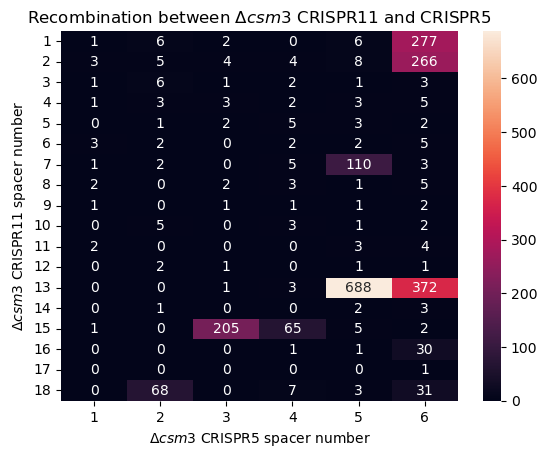

In [44]:
df2 = pd.read_csv('./CR11vsCR5_dCsm3.csv', sep=',')
g = df2.groupby(['spacer2_ord', 'spacer1_ord'])
rec_cnt2 = g.read_name.nunique()
df2_rec_cnt = rec_cnt2.reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df2_rec_cnt.fillna(0, inplace=True)
a=df2_rec_cnt.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
a.rename(columns=dic, inplace=True)
a.rename(dic, inplace=True)
ax=sns.heatmap(a, annot=True, fmt="g")
ax.set_title('Recombination between $\Delta csm3$ CRISPR11 and CRISPR5')
ax.set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR11 spacer number')

plt.yticks(rotation=0)
plt.savefig('dcsm3_11vs5_raw.png', dpi=360, bbox_inches='tight')
plt.show()

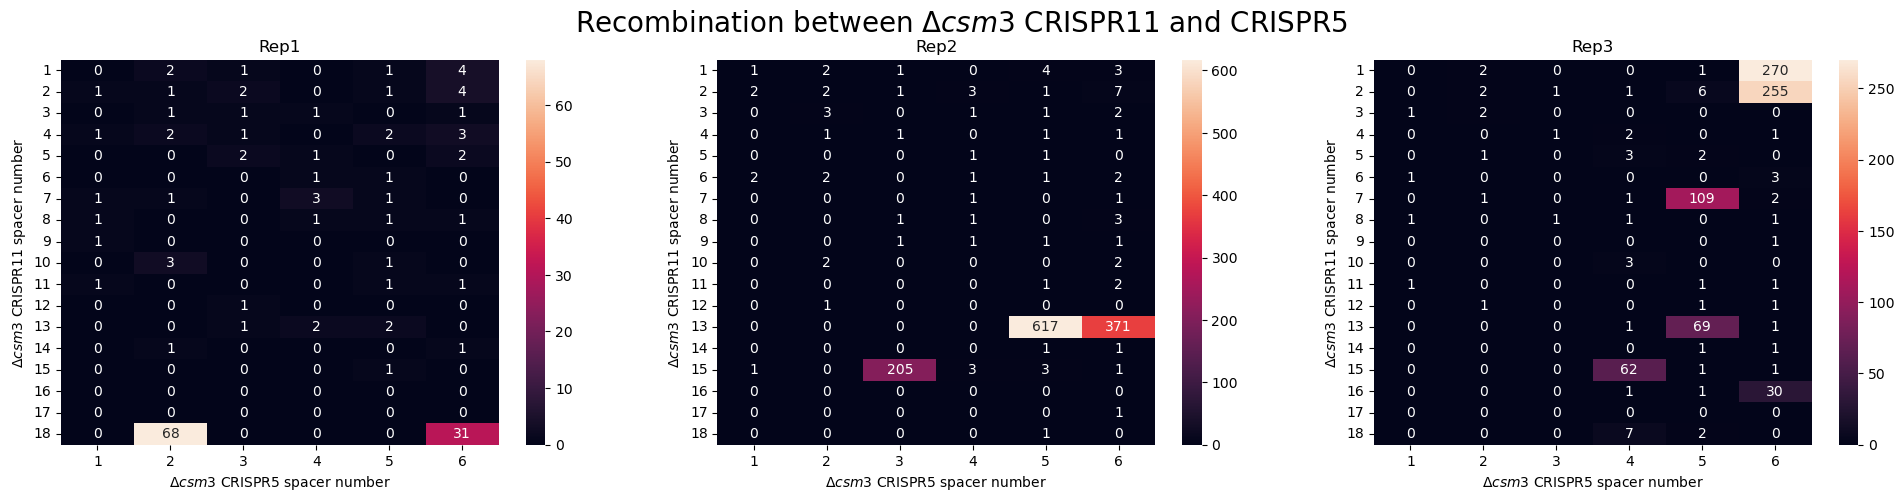

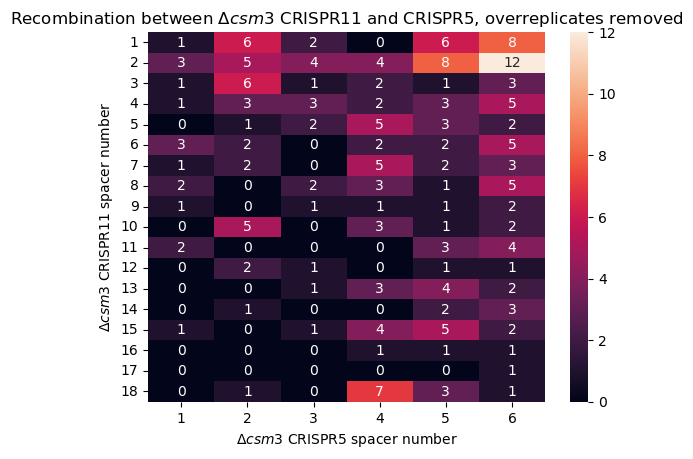

In [45]:
g = df2.groupby(['spacer2_ord', 'spacer1_ord', 'rep'])
rec_cnt = g.read_name.nunique()

fig, axes = plt.subplots(1, 3, figsize=(24, 5)) #, gridspec_kw={'width_ratios': [a, b, c]})
fig.suptitle('Recombination between $\Delta csm3$ CRISPR11 and CRISPR5', fontsize=20)

df_rec_cnt1 = rec_cnt.loc[:,:,'rep1'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt1.fillna(0, inplace=True)
h1=df_rec_cnt1.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
#h1['spacer2']=0
#h1['spacer8']=0
h1=h1[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6']]
h1.fillna(0, inplace=True)
h1.rename(columns=dic, inplace=True)
h1.rename(dic, inplace=True)
sns.heatmap(h1, annot=True, ax=axes[0], fmt="g")
axes[0].set_title('Rep1')
axes[0].set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR11 spacer number')

df_rec_cnt2 = rec_cnt.loc[:,:,'rep2'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt2.fillna(0, inplace=True)
h2=df_rec_cnt2.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
#h2['spacer2']=0
h2=h2[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6']]
h2.fillna(0, inplace=True)
h2.rename(columns=dic, inplace=True)
h2.rename(dic, inplace=True)
sns.heatmap(h2, annot=True, ax=axes[1], fmt="g")
axes[1].set_title('Rep2')
axes[1].set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR11 spacer number')

df_rec_cnt3 = rec_cnt.loc[:,:,'rep3'].reset_index().pivot(index='spacer2_ord', columns='spacer1_ord', values='read_name')
df_rec_cnt3.fillna(0, inplace=True)
h3=df_rec_cnt3.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14','spacer15','spacer16','spacer17','spacer18'])
#h3['spacer2']=0
#h3['spacer6']=0
#h3['spacer12']=0
h3=h3[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6']]
h3.fillna(0, inplace=True)
h3.rename(columns=dic, inplace=True)
h3.rename(dic, inplace=True)
sns.heatmap(h3, annot=True, ax=axes[2], fmt="g")
axes[2].set_title('Rep3')
axes[2].set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR11 spacer number')

for i in range(0, 3):
  for tick in axes[i].get_yticklabels():
    tick.set_rotation(0)

plt.savefig('dcsm3_11vs5_byreps.png', dpi=360, bbox_inches='tight')
plt.show()

h1[h1>15]=1
h2[h2>15]=1
h3[h3>15]=1
h_thr_dcsm11vs5=h1+h2+h3
ax=sns.heatmap(h_thr_dcsm11vs5, annot=True, fmt="g")
ax.set_title('Recombination between $\Delta csm3$ CRISPR11 and CRISPR5, overreplicates removed')
ax.set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR11 spacer number')

plt.yticks(rotation=0)
plt.savefig('dcsm3_11vs5_removed.png', dpi=360, bbox_inches='tight')
plt.show()

In [ ]:
For dCsm3 CRISPR2 vs CRISPR5 recombination

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


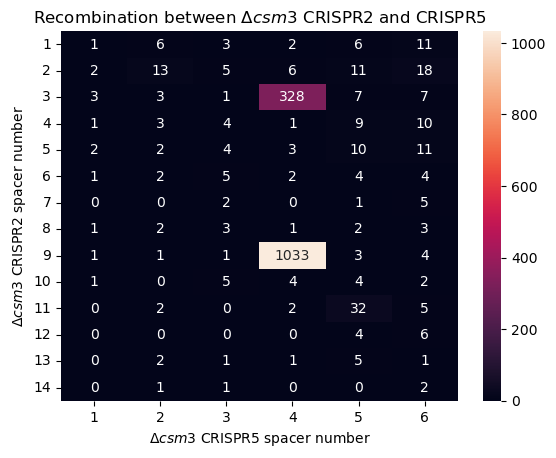

In [9]:
df3 = pd.read_csv('./CR2vsCR5_dCsm3.csv', sep=',')
g = df3.groupby(['spacer1_ord', 'spacer2_ord'])
rec_cnt3 = g.read_name.nunique()
df3_rec_cnt = rec_cnt3.reset_index().pivot(index='spacer1_ord', columns='spacer2_ord', values='read_name')
df3_rec_cnt.fillna(0, inplace=True)
a=df3_rec_cnt.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14'])
a.rename(columns=dic, inplace=True)
a.rename(dic, inplace=True)
ax=sns.heatmap(a, annot=True, fmt="g")
ax.set_title('Recombination between $\Delta csm3$ CRISPR2 and CRISPR5')
ax.set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR2 spacer number')

plt.yticks(rotation=0)
plt.savefig('dcsm3_2vs5_raw.png', dpi=360, bbox_inches='tight')
plt.show()

In [12]:
df3


read_name  CRISPR1  spacer1  begin1  end1  \
0     00067030-6f8a-4c9c-87c7-efe2103fa883  CRISPR2  spacer9    1222  1257   
1     0048e30f-b247-48eb-8a07-304da30129db  CRISPR5  spacer1     642   660   
2     008a7e88-1140-4fbf-82f6-fdc57e287434  CRISPR2  spacer5     938   981   
3     00a5acf6-02e7-479c-8456-8e3b2827f935  CRISPR5  spacer4     403   419   
4     00b4d06d-0e8f-4a4d-9c36-e2a6eac0bb8e  CRISPR5  spacer3     470   509   
...                                    ...      ...      ...     ...   ...   
1650  ff85d846-7613-4edd-a813-493d0006460c  CRISPR5  spacer2     553   589   
1651  ffaab71b-0e40-4e76-a649-cd98117d0c5b  CRISPR2  spacer3     777   814   
1652  ffb8d612-e456-40b8-a217-10222801d7c6  CRISPR2  spacer9    1236  1270   
1653  ffd93839-f2fb-4d91-966e-12a7302cc626  CRISPR5  spacer4     404   437   
1654  fffc226a-f51a-4ee0-9142-91d3d936dcf0  CRISPR5  spacer4     393   429   

      CRISPR2   spacer2  begin2  end2 primers   rep CRISPR1_ord spacer1_ord  \
0     CRISPR5   spacer4    1293  1319   F2_R2  rep1     CRISPR2     spacer9   
1     CRISPR2   spacer3     697   729   F2_R2  rep2     CRISPR2     spacer3   
2     CRISPR5   spacer3    1024  1057   F2_R2  rep3     CRISPR2     spacer5   
3     CRISPR2   spacer3     476   513   F2_R2  rep3     CRISPR2     spacer3   
4     CRISPR2   spacer6     546   584   F2_R2  rep2     CRISPR2     spacer6   
...       ...       ...     ...   ...     ...   ...         ...         ...   
1650  CRISPR2  spacer14     625   668   F2_R2  rep2     CRISPR2    spacer14   
1651  CRISPR5   spacer4     852   888   F2_R2  rep3     CRISPR2     spacer3   
1652  CRISPR5   spacer4    1305  1341   F2_R2  rep1     CRISPR2     spacer9   
1653  CRISPR2   spacer9     474   510   F2_R2  rep1     CRISPR2     spacer9   
1654  CRISPR2   spacer3     466   503   F2_R2  rep3     CRISPR2     spacer3   

     CRISPR2_ord spacer2_ord  diff  filter  
0        CRISPR5     spacer4    36    True  
1        CRISPR5     spacer1    37    True  
2        CRISPR5     spacer3    43    True  
3        CRISPR5     spacer4    57    True  
4        CRISPR5     spacer3    37    True  
...          ...         ...   ...     ...  
1650     CRISPR5     spacer2    36    True  
1651     CRISPR5     spacer4    38    True  
1652     CRISPR5     spacer4    35    True  
1653     CRISPR5     spacer4    37    True  
1654     CRISPR5     spacer4    37    True  

[1655 rows x 17 columns]

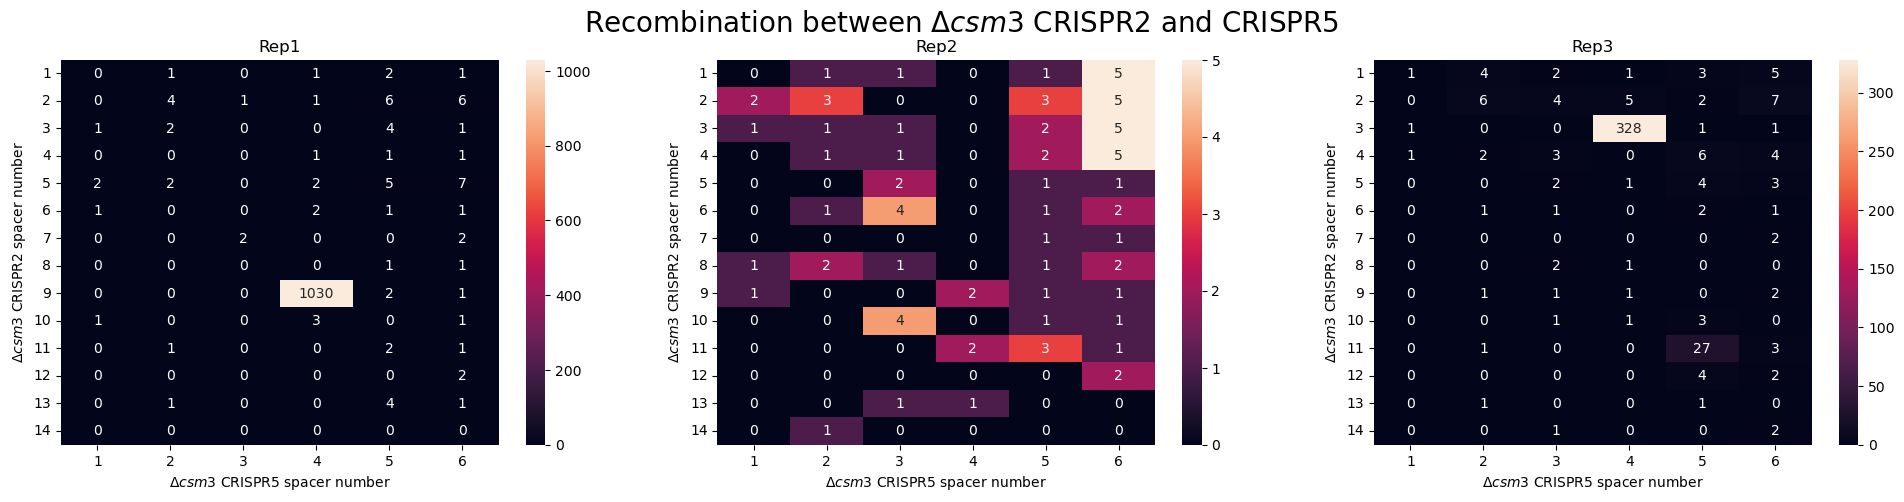

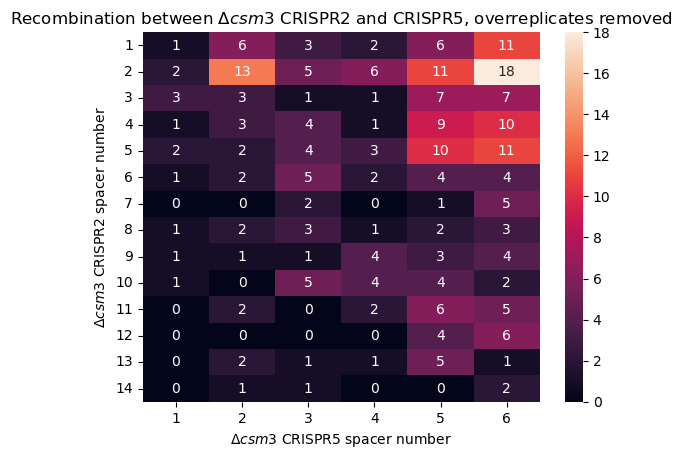

In [18]:
g = df3.groupby(['spacer2_ord', 'spacer1_ord', 'rep'])
rec_cnt = g.read_name.nunique()

fig, axes = plt.subplots(1, 3, figsize=(24, 5)) #, gridspec_kw={'width_ratios': [a, b, c]})
fig.suptitle('Recombination between $\Delta csm3$ CRISPR2 and CRISPR5', fontsize=20)

df_rec_cnt1 = rec_cnt.loc[:,:,'rep1'].reset_index().pivot(index='spacer1_ord', columns='spacer2_ord', values='read_name')
df_rec_cnt1.fillna(0, inplace=True)
h1=df_rec_cnt1.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14'])
#h1['spacer2']=0
#h1['spacer8']=0
h1=h1[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6']]
h1.fillna(0, inplace=True)
h1.rename(columns=dic, inplace=True)
h1.rename(dic, inplace=True)
h1
sns.heatmap(h1, annot=True, ax=axes[0], fmt="g")
axes[0].set_title('Rep1')
axes[0].set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR2 spacer number')

df_rec_cnt2 = rec_cnt.loc[:,:,'rep2'].reset_index().pivot(index='spacer1_ord', columns='spacer2_ord', values='read_name')
df_rec_cnt2.fillna(0, inplace=True)
h2=df_rec_cnt2.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14'])
#h2['spacer2']=0
h2=h2[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6']]
h2.fillna(0, inplace=True)
h2.rename(columns=dic, inplace=True)
h2.rename(dic, inplace=True)
sns.heatmap(h2, annot=True, ax=axes[1], fmt="g")
axes[1].set_title('Rep2')
axes[1].set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR2 spacer number')

df_rec_cnt3 = rec_cnt.loc[:,:,'rep3'].reset_index().pivot(index='spacer1_ord', columns='spacer2_ord', values='read_name')
df_rec_cnt3.fillna(0, inplace=True)
h3=df_rec_cnt3.reindex(['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6','spacer7','spacer8','spacer9','spacer10','spacer11','spacer12','spacer13','spacer14'])
#h3['spacer2']=0
#h3['spacer6']=0
#h3['spacer12']=0
h3=h3[['spacer1','spacer2','spacer3','spacer4','spacer5','spacer6']]
h3.fillna(0, inplace=True)
h3.rename(columns=dic, inplace=True)
h3.rename(dic, inplace=True)
sns.heatmap(h3, annot=True, ax=axes[2], fmt="g")
axes[2].set_title('Rep3')
axes[2].set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR2 spacer number')

for i in range(0, 3):
  for tick in axes[i].get_yticklabels():
    tick.set_rotation(0)

plt.savefig('dcsm3_2vs5_byreps.png', dpi=360, bbox_inches='tight')
plt.show()

h1[h1>15]=1
h2[h2>15]=1
h3[h3>15]=1
h_thr=h1+h2+h3
ax=sns.heatmap(h_thr, annot=True, fmt="g")
ax.set_title('Recombination between $\Delta csm3$ CRISPR2 and CRISPR5, overreplicates removed')
ax.set(xlabel='$\Delta csm3$ CRISPR5 spacer number', ylabel='$\Delta csm3$ CRISPR2 spacer number')

plt.yticks(rotation=0)
plt.savefig('dcsm3_2vs5_removed.png', dpi=360, bbox_inches='tight')
plt.show()


In the case of CRISPR11 vs CRISPR5 recombination we can merge the data from two strains.

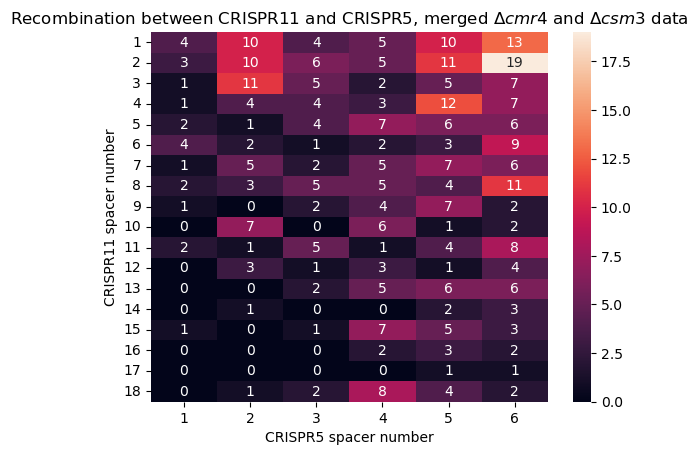

In [49]:
h_thr_merged=h_thr_dcmr11vs5+h_thr_dcsm11vs5

ax=sns.heatmap(h_thr_merged, annot=True, fmt="g")
ax.set_title('Recombination between CRISPR11 and CRISPR5, merged $\Delta cmr4$ and $\Delta csm3$ data')
ax.set(xlabel='CRISPR5 spacer number', ylabel='CRISPR11 spacer number')

plt.yticks(rotation=0)
plt.savefig('11vs5_merged.png', dpi=360, bbox_inches='tight')
plt.show()